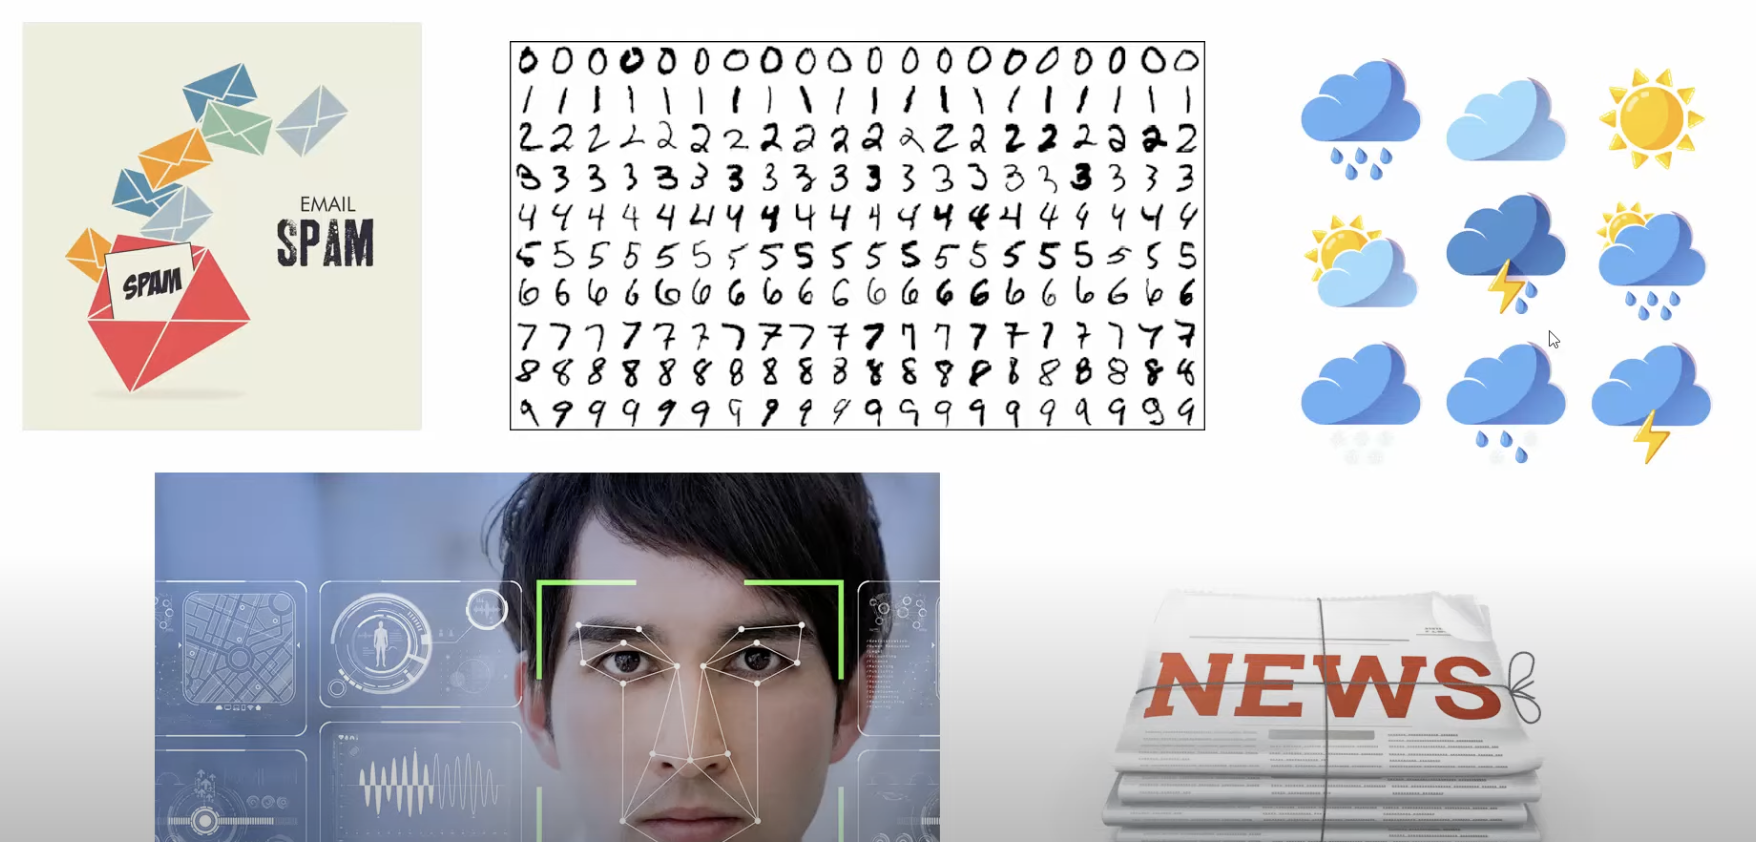

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

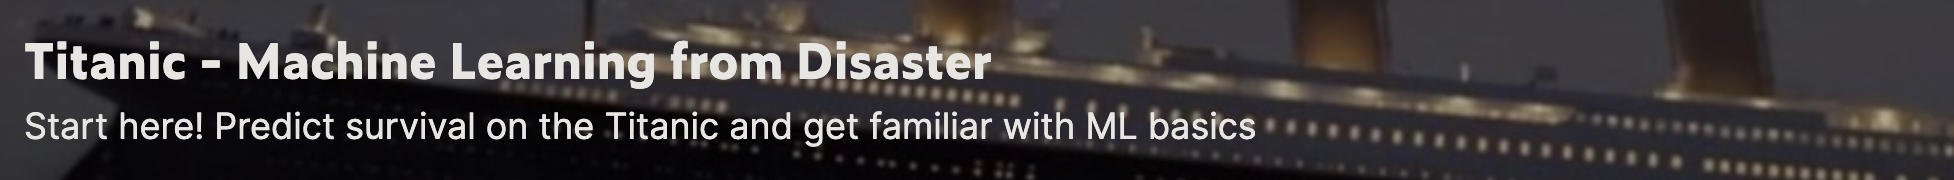

In [ ]:
df = pd.read_csv('data/titanic.csv')
df.head()

In [7]:
df.drop(['PassengerId','Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)
df.head()

Pclass     Sex   Age     Fare  Survived
0       3    male  22.0   7.2500         0
1       1  female  38.0  71.2833         1
2       3  female  26.0   7.9250         1
3       1  female  35.0  53.1000         1
4       3    male  35.0   8.0500         0

In [9]:
target = df.Survived
inputs = df.drop('Survived', axis='columns')
inputs

Pclass     Sex   Age     Fare
0         3    male  22.0   7.2500
1         1  female  38.0  71.2833
2         3  female  26.0   7.9250
3         1  female  35.0  53.1000
4         3    male  35.0   8.0500
..      ...     ...   ...      ...
886       2    male  27.0  13.0000
887       1  female  19.0  30.0000
888       3  female   NaN  23.4500
889       1    male  26.0  30.0000
890       3    male  32.0   7.7500

[891 rows x 4 columns]

## String data preprocessing

In [10]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1

In [11]:
inputs = pd.concat([inputs,dummies], axis='columns')
inputs.head(3)

Pclass     Sex   Age     Fare  female  male
0       3    male  22.0   7.2500       0     1
1       1  female  38.0  71.2833       1     0
2       3  female  26.0   7.9250       1     0

In [12]:
inputs.drop('Sex', axis='columns', inplace=True)
inputs.head()

Pclass   Age     Fare  female  male
0       3  22.0   7.2500       0     1
1       1  38.0  71.2833       1     0
2       3  26.0   7.9250       1     0
3       1  35.0  53.1000       1     0
4       3  35.0   8.0500       0     1

## Deal with NA 

In [13]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [14]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [15]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.Age[:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

### Train test split

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2)

In [18]:
len(x_train)

712

In [19]:
len(x_test)

179

### Model creation

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [21]:
model.fit(x_train,y_train)

GaussianNB()

In [22]:
model.score(x_test,y_test)

0.7821229050279329

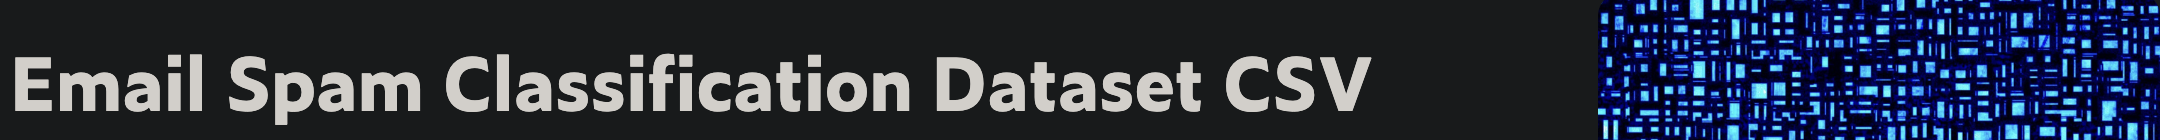

In [23]:
import pandas as pd
df = pd.read_csv('data/spam.csv')
df.head()

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

## Data explore

In [24]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [25]:
dummies = pd.get_dummies(df.Category)
dummies.head()

ham  spam
0    1     0
1    1     0
2    0     1
3    1     0
4    1     0

In [26]:
df_one = pd.concat([df,dummies],axis='columns')
df_one.head()

Category                                            Message  ham  spam
0      ham  Go until jurong point, crazy.. Available only ...    1     0
1      ham                      Ok lar... Joking wif u oni...    1     0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...    0     1
3      ham  U dun say so early hor... U c already then say...    1     0
4      ham  Nah I don't think he goes to usf, he lives aro...    1     0

In [27]:
df['Spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

Category                                            Message  Spam
0      ham  Go until jurong point, crazy.. Available only ...     0
1      ham                      Ok lar... Joking wif u oni...     0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3      ham  U dun say so early hor... U c already then say...     0
4      ham  Nah I don't think he goes to usf, he lives aro...     0

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.Message, df.Spam, test_size=0.2)

### Count vectorizer technique

1. Find unique words in each documnets
2. Create a vector using those words

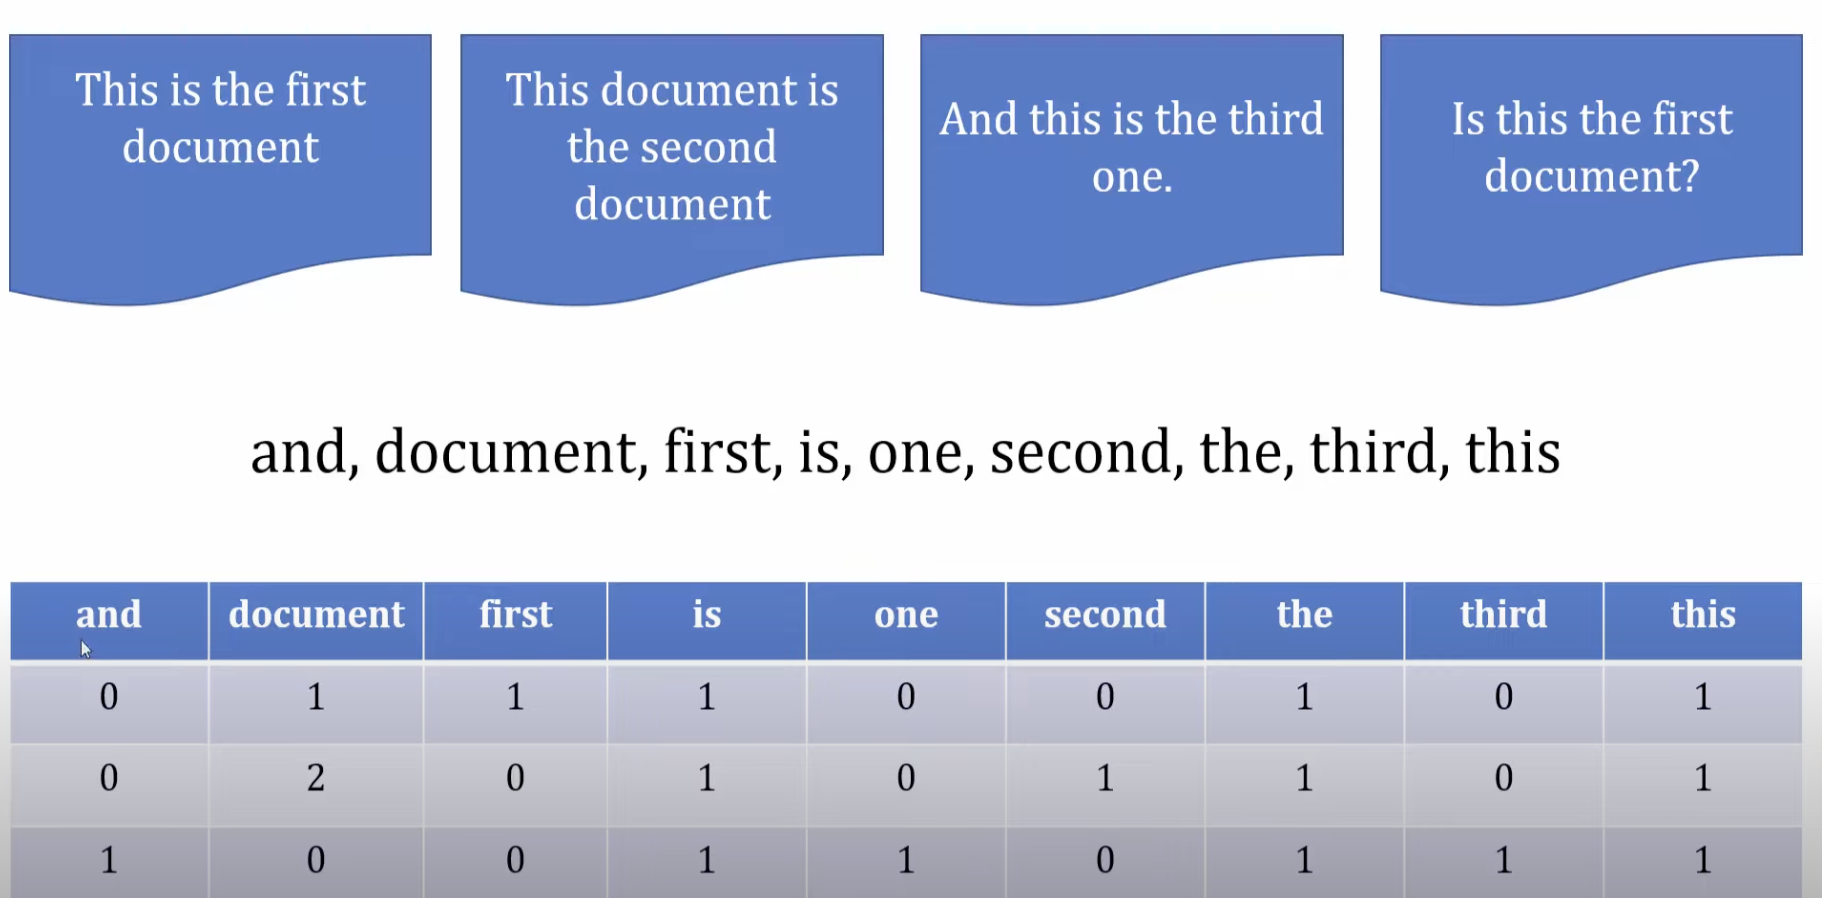

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [31]:
x_train_count = cv.fit_transform(x_train.values)
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

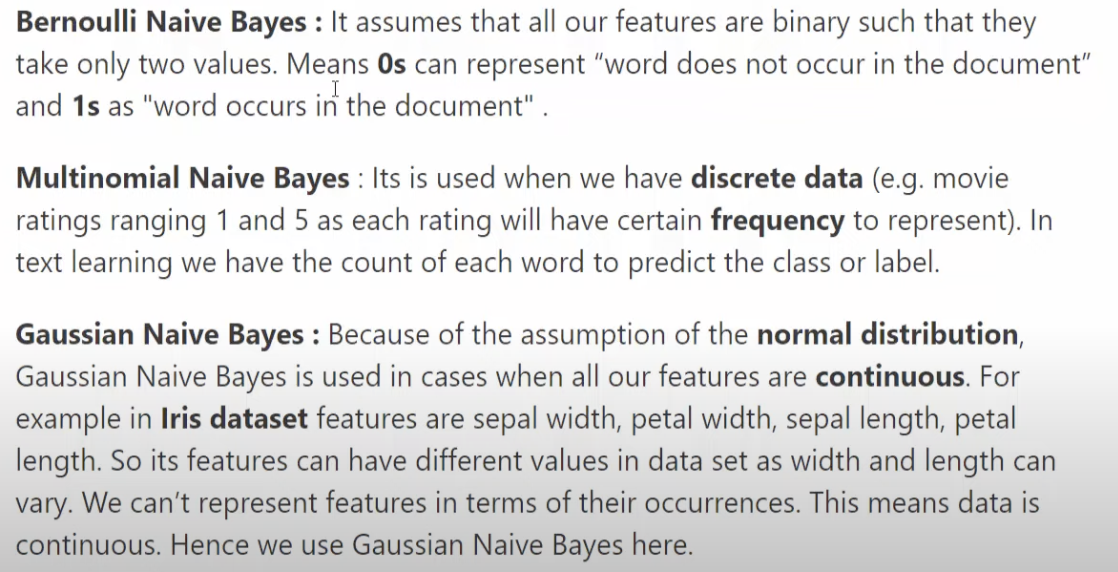

In [32]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

### Prediction

In [33]:
x_test_count = cv.transform(x_test.values)

In [34]:
model.score(x_test_count,y_test)

0.9838565022421525

In [40]:
y_pred = model.predict(x_test_count)
y_pred[40:50]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [41]:
y_test[40:50]

26      0
5423    0
343     0
1507    1
2639    0
268     1
1771    0
1880    1
4016    1
3933    0
Name: Spam, dtype: int64

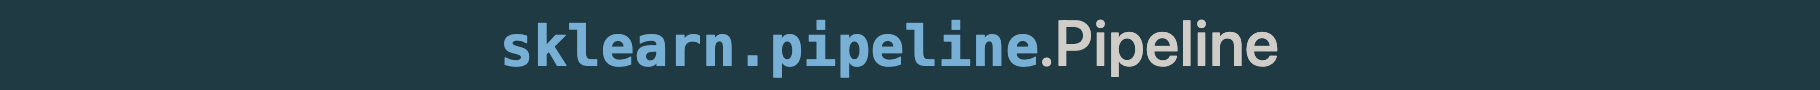

In [42]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('model', MultinomialNB())
])

In [43]:
clf.fit(x_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()), ('model', MultinomialNB())])

In [44]:
clf.score(x_test,y_test)

0.9838565022421525